# S&P 500 Volatility Smile
The goal of this notebook is to examine implied volatility data of options on SP500 index and understand volatility skewness


In [5]:
# import libararies
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [123]:
# import SPX options data from yahoofinance
spx = yf.Ticker("^SPX")
exp_dates = spx.options
print('Expiry Dates: ')
print(exp_dates)

Expiry Dates: 
('2020-05-12', '2020-05-14', '2020-05-17', '2020-05-19', '2020-05-21', '2020-05-25', '2020-05-26', '2020-05-28', '2020-05-31', '2020-06-02', '2020-06-04', '2020-06-07', '2020-06-11', '2020-06-18', '2020-06-25', '2020-06-29', '2020-07-01', '2020-07-16', '2020-07-30', '2020-08-20', '2020-08-30', '2020-09-17', '2020-09-18', '2020-09-29', '2020-10-15', '2020-10-29', '2020-11-19', '2020-12-17', '2020-12-30', '2021-01-14', '2021-03-18', '2021-03-30', '2021-06-17', '2021-12-16', '2022-12-15', '2026-03-19')


## Prepare Data:

In [254]:
# helper function 
def __modify_df(df, col_name):
    # set index and rename column name
    df.set_index('strike', inplace=True)
    col_name = pd.to_datetime(col_name)
    df.rename(columns={'impliedVolatility': col_name}, inplace=True)
    return df
    
# function to get implied volatility data
def get_implied_vols():
    c = []
    p = []
    
    # go through every expiry dates
    for d in exp_dates:
        opt = spx.option_chain(d)
        
        # get call options implied volatility data
        df_c = opt.calls[['strike', 'impliedVolatility']].copy()
        df_c = __modify_df(df_c, d)
        if not df_c.empty:
            c.append(df_c)
        
        # get put options implied volatility data
        df_p = opt.puts[['strike', 'impliedVolatility']].copy()
        df_p = __modify_df(df_p, d)
        if not df_p.empty:
            p.append(df_p)
    
    df_c = pd.concat(c, axis=1)
    df_p = pd.concat(p, axis=1)
    return df_c, df_p


# Implied Volatility Data for calls and puts:
call_imp_vol_df, put_imp_vol_df = get_implied_vols()        

In [255]:
# This is what the dataframe looks like, for simplicty will only show the bottom 3 rows for one date:
print(call_imp_vol_df.tail(3))

        2020-05-12  2020-05-14  2020-05-17  2020-05-19  2020-05-21  \
strike                                                               
4700.0         NaN         NaN         NaN         NaN         NaN   
4800.0         NaN         NaN         NaN         NaN         NaN   
4900.0         NaN         NaN         NaN         NaN         NaN   

        2020-05-25  2020-05-26  2020-05-28  2020-05-31  2020-06-02  ...  \
strike                                                              ...   
4700.0         NaN         NaN         NaN         NaN         NaN  ...   
4800.0         NaN         NaN         NaN         NaN         NaN  ...   
4900.0         NaN         NaN         NaN         NaN         NaN  ...   

        2020-10-29  2020-11-19  2020-12-17  2020-12-30  2021-01-14  \
strike                                                               
4700.0         NaN         NaN         NaN         NaN    0.209603   
4800.0         NaN         NaN         NaN         NaN    0.214

## Volatility Smile Charts:

In [256]:
# chart function
def chart_vol_smile(df):
    for d in df.columns:
        df_a = df[d]
        df_a.dropna(inplace=True)
        ax = df_a.plot.line()
        print(d)
        plt.show() 

2020-05-12 00:00:00


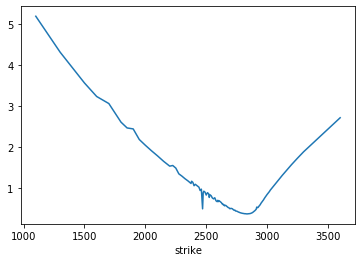

2020-05-14 00:00:00


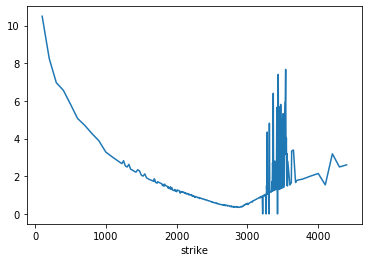

2020-05-17 00:00:00


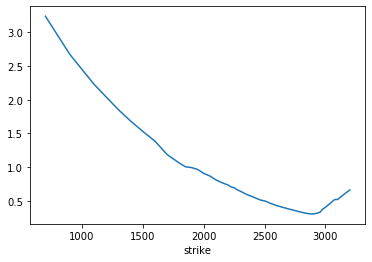

2020-05-19 00:00:00


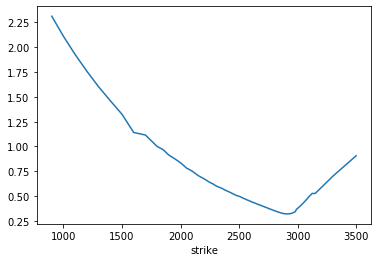

2020-05-21 00:00:00


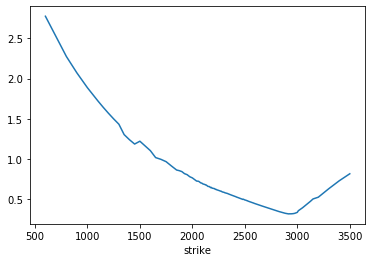

2020-05-25 00:00:00


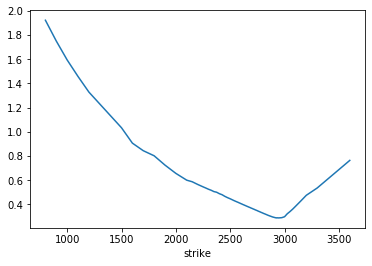

2020-05-26 00:00:00


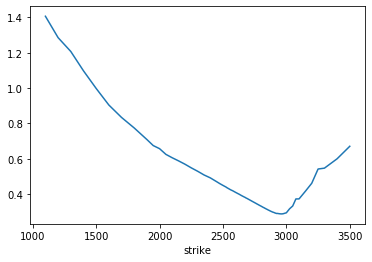

2020-05-28 00:00:00


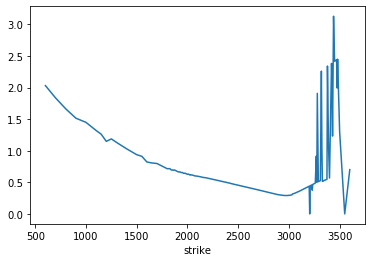

2020-05-31 00:00:00


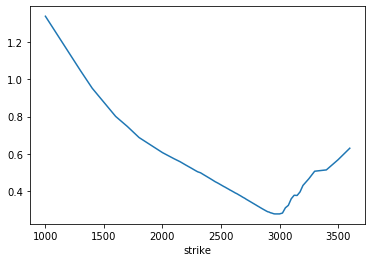

2020-06-02 00:00:00


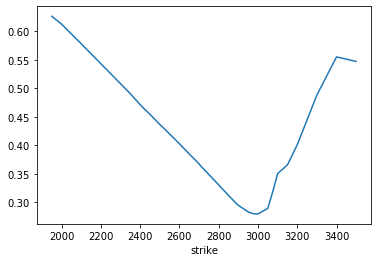

2020-06-04 00:00:00


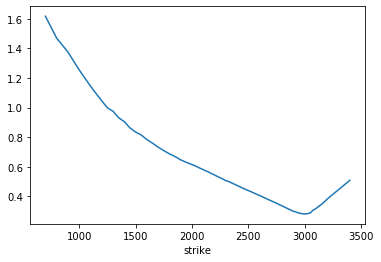

2020-06-07 00:00:00


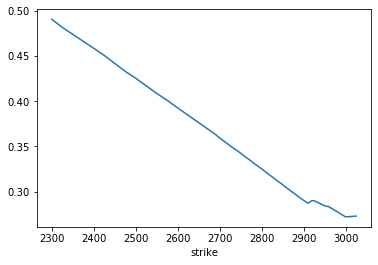

2020-06-11 00:00:00


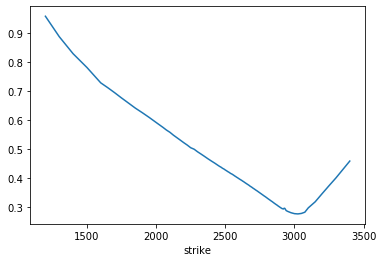

2020-06-18 00:00:00


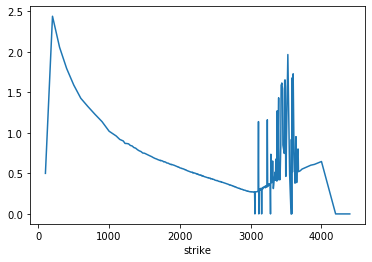

2020-06-25 00:00:00


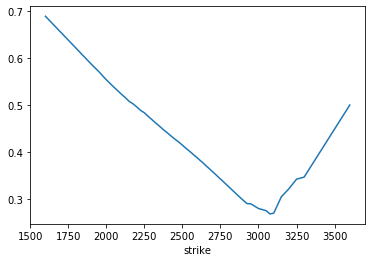

2020-06-29 00:00:00


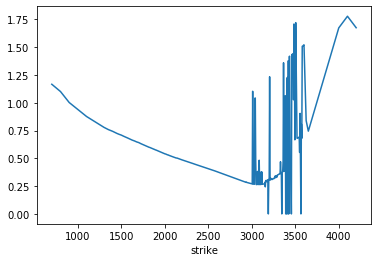

2020-07-01 00:00:00


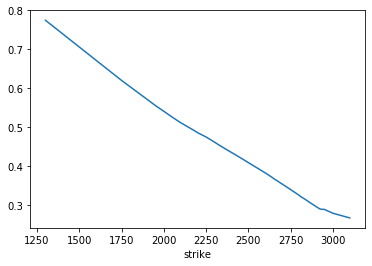

2020-07-16 00:00:00


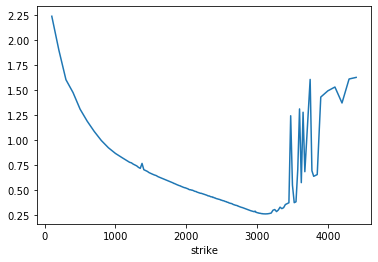

2020-07-30 00:00:00


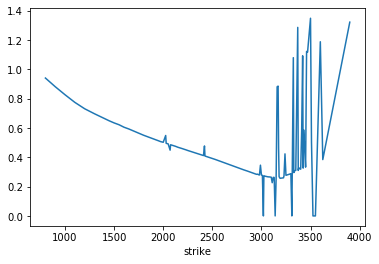

2020-08-20 00:00:00


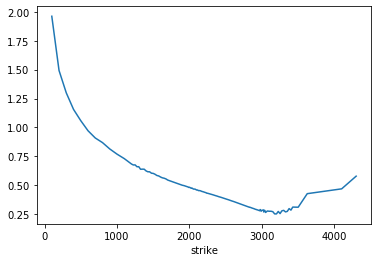

2020-08-30 00:00:00


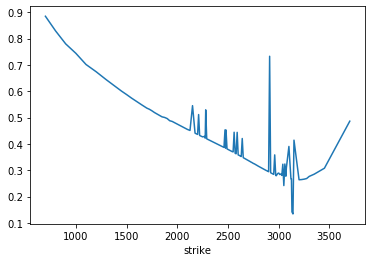

2020-09-17 00:00:00


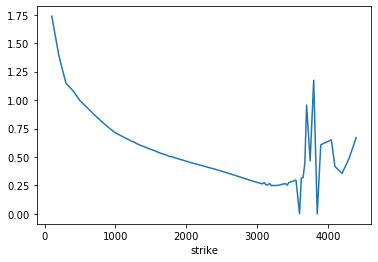

2020-09-29 00:00:00


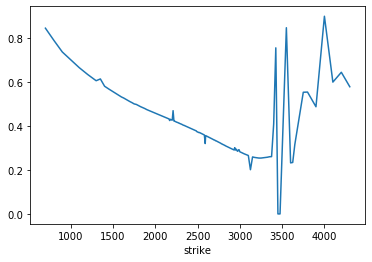

2020-10-15 00:00:00


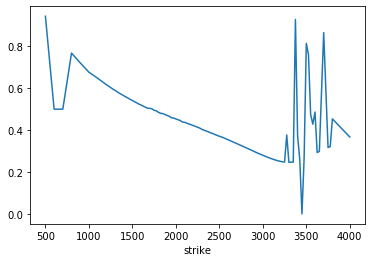

2020-10-29 00:00:00


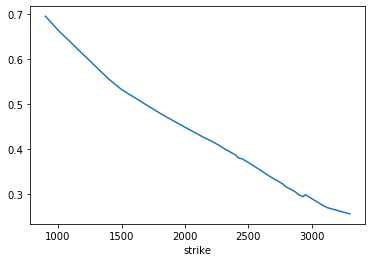

2020-11-19 00:00:00


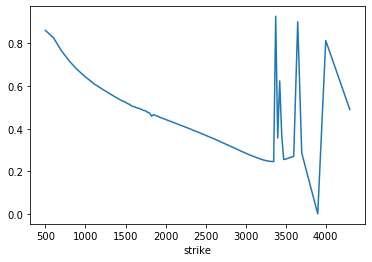

2020-12-17 00:00:00


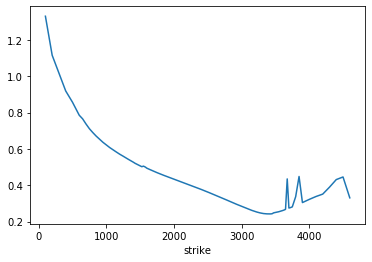

2020-12-30 00:00:00


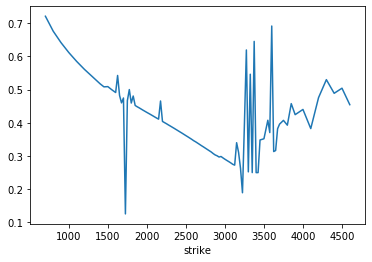

2021-01-14 00:00:00


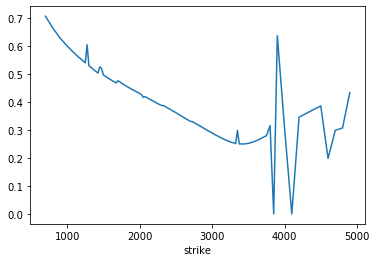

2021-03-18 00:00:00


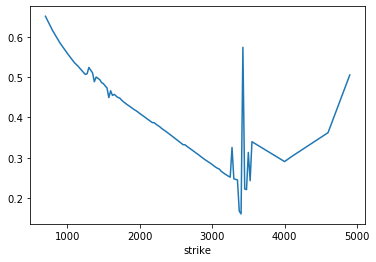

2021-03-30 00:00:00


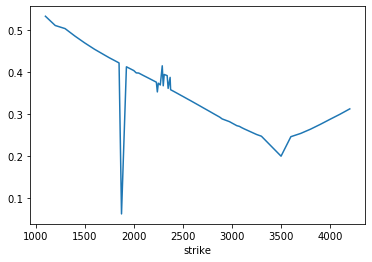

2021-06-17 00:00:00


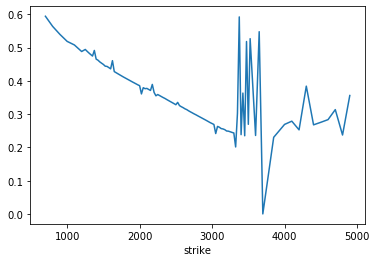

2021-12-16 00:00:00


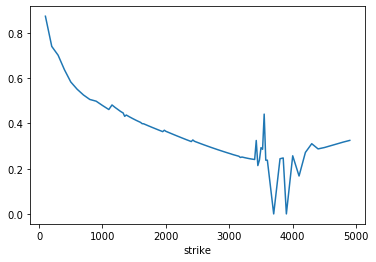

2022-12-15 00:00:00


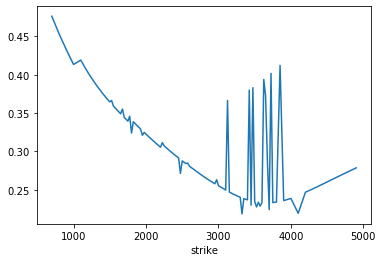

In [257]:
# put options Volatility smile:
chart_vol_smile(put_imp_vol_df)

2020-05-12 00:00:00


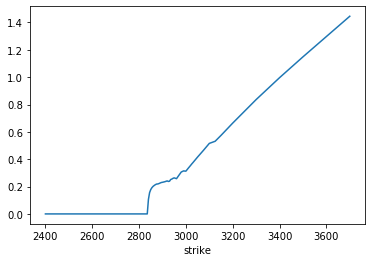

2020-05-14 00:00:00


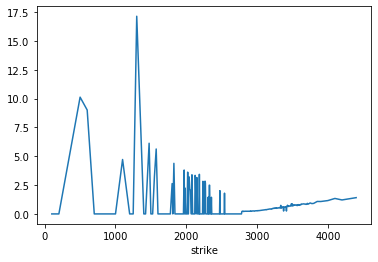

2020-05-17 00:00:00


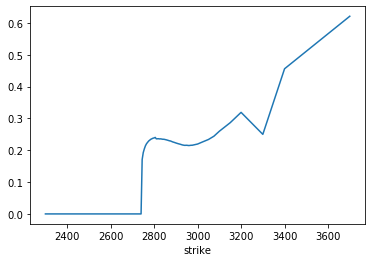

2020-05-19 00:00:00


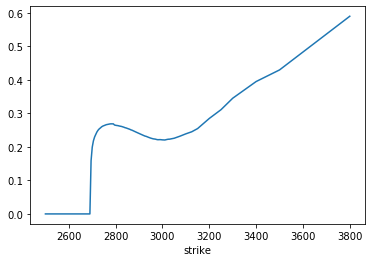

2020-05-21 00:00:00


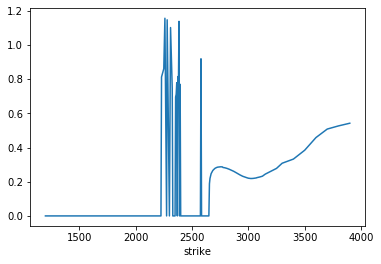

2020-05-25 00:00:00


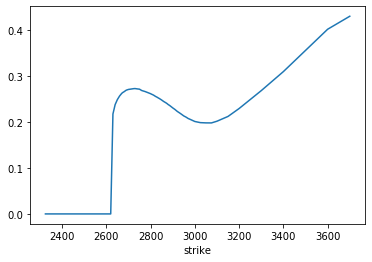

2020-05-26 00:00:00


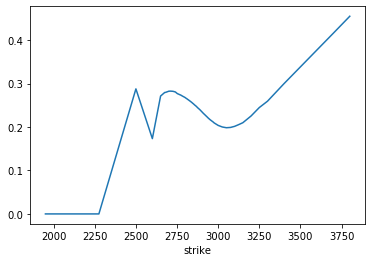

2020-05-28 00:00:00


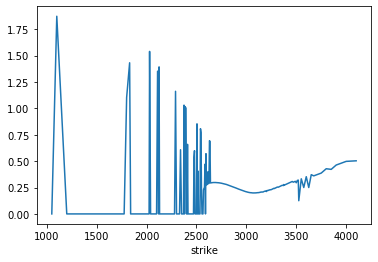

2020-05-31 00:00:00


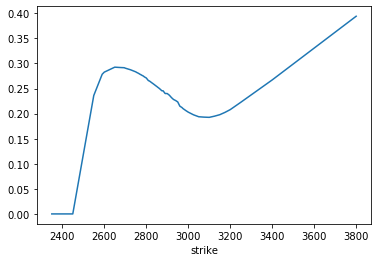

2020-06-02 00:00:00


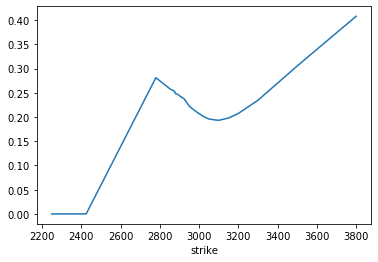

2020-06-04 00:00:00


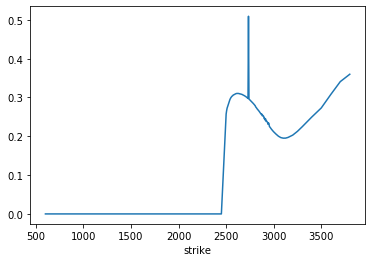

2020-06-07 00:00:00


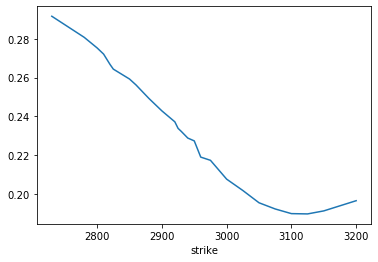

2020-06-11 00:00:00


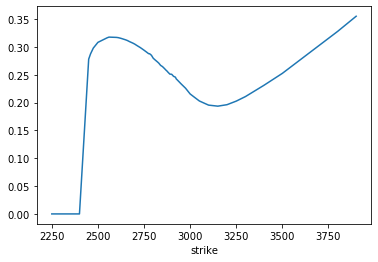

2020-06-18 00:00:00


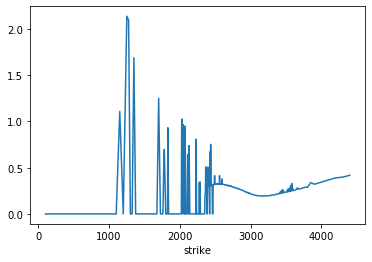

2020-06-25 00:00:00


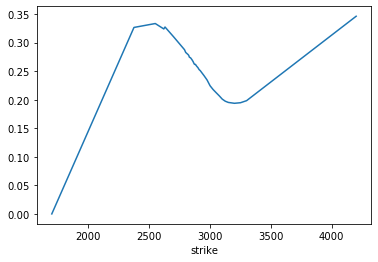

2020-06-29 00:00:00


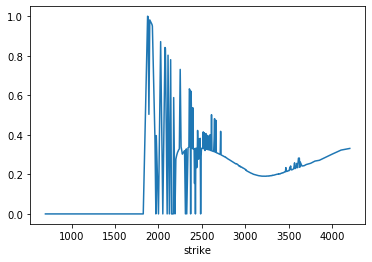

2020-07-01 00:00:00


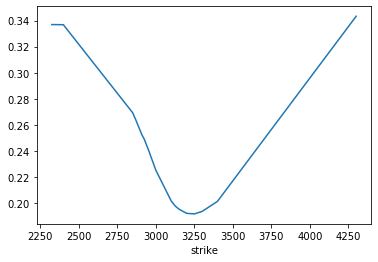

2020-07-16 00:00:00


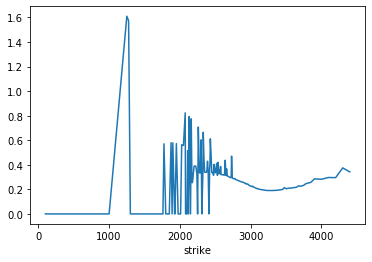

2020-07-30 00:00:00


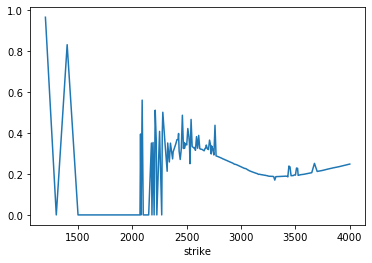

2020-08-20 00:00:00


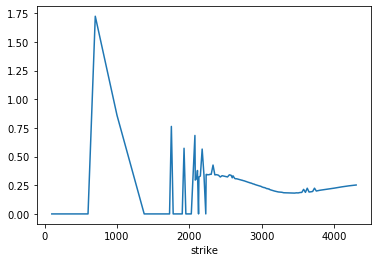

2020-08-30 00:00:00


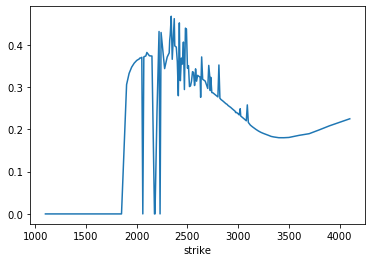

2020-09-17 00:00:00


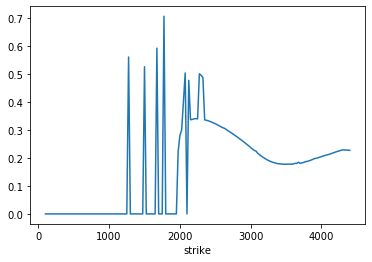

2020-09-29 00:00:00


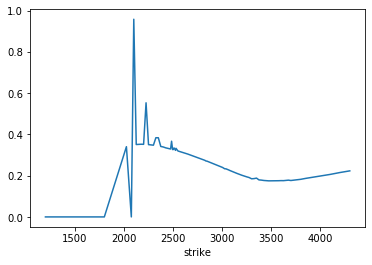

2020-10-15 00:00:00


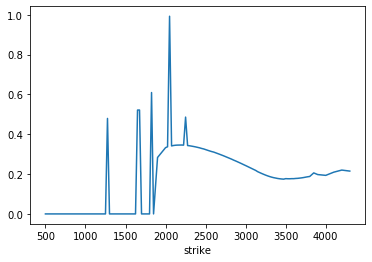

2020-10-29 00:00:00


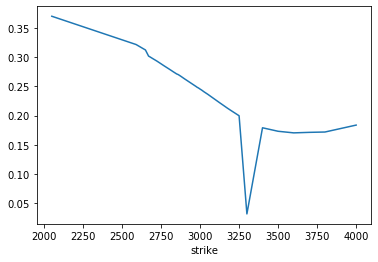

2020-11-19 00:00:00


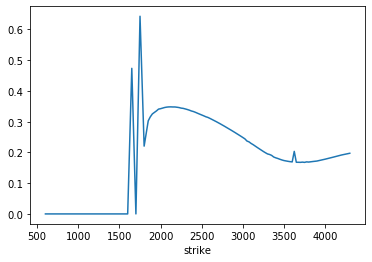

2020-12-17 00:00:00


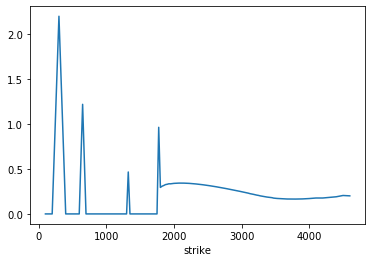

2020-12-30 00:00:00


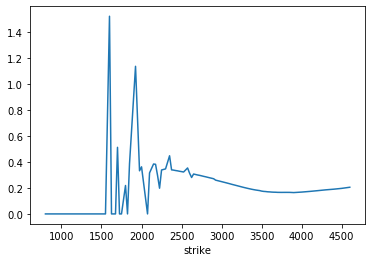

2021-01-14 00:00:00


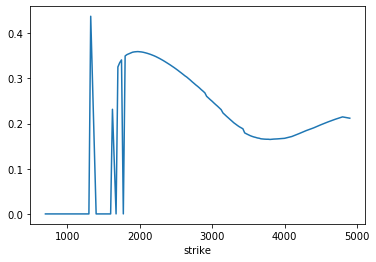

2021-03-18 00:00:00


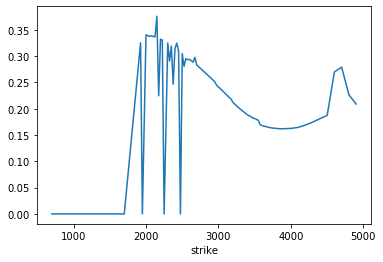

2021-03-30 00:00:00


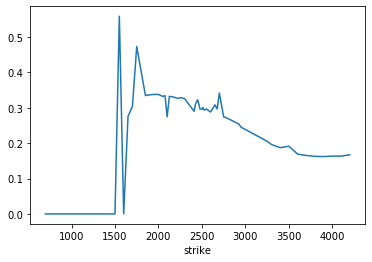

2021-06-17 00:00:00


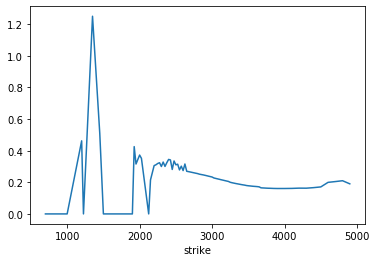

2021-12-16 00:00:00


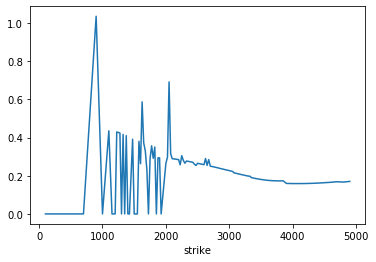

2022-12-15 00:00:00


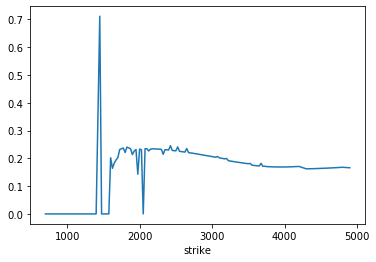

In [274]:
# call options Volatility smile:
chart_vol_smile(call_imp_vol_df)